In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

# TO READ FILE



In [3]:
data=pd.read_csv('car_age_price.csv')
data_copy=data
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# Below code provide the dataset information & also provides a statistical summary


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# check for any missing value /null value

In [5]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [6]:
data.duplicated()

0      False
1      False
2      False
3       True
4       True
       ...  
107    False
108    False
109    False
110    False
111     True
Length: 112, dtype: bool

# histogram representation

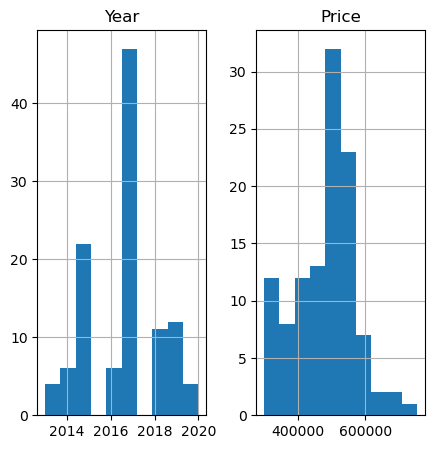

In [7]:
freq_graph = data.select_dtypes(include=['integer'])
freq_graph.hist(figsize=[5,5])
plt.show()

# Correlation btwn parameters

           Year     Price
Year   1.000000  0.776302
Price  0.776302  1.000000


<AxesSubplot:>

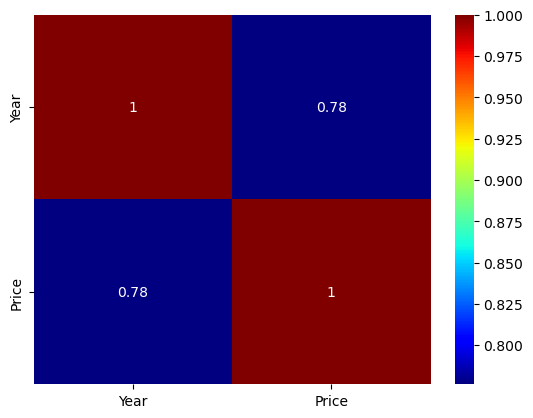

In [8]:
print(data.corr())
sns.heatmap(data.corr(),annot=True,cmap='jet')

# Scatter plot diagram to check trend of available data

<AxesSubplot:xlabel='Price', ylabel='Year'>

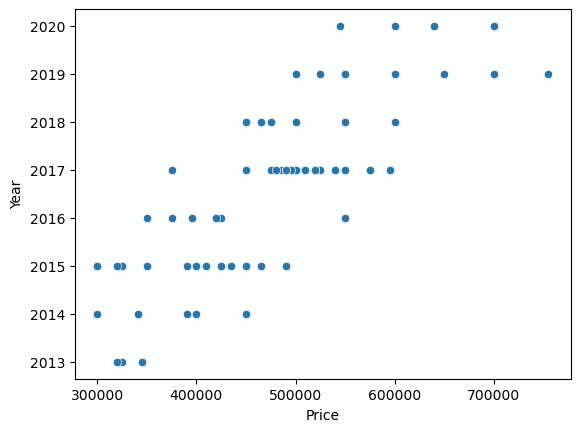

In [9]:
sns.scatterplot(data=data, x='Price',y='Year')

# one hot encoding

In [10]:
data=pd.get_dummies(data)
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# outliers

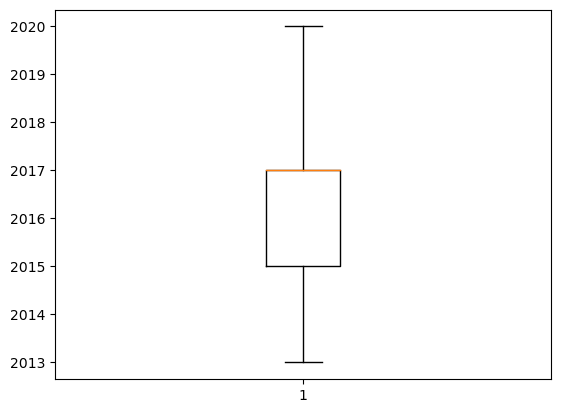

In [12]:
plt.boxplot(data['Year'])
plt.show()

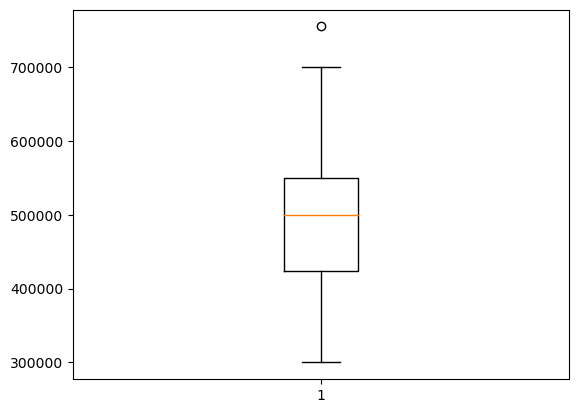

In [13]:
plt.boxplot(data['Price'])
plt.show()

# Iqr in price

In [14]:
from sklearn.utils import DataConversionWarning
IQR=stats.iqr(data['Price'])
Q1=data['Price'].quantile(0.25)
Q3=data['Price'].quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR

In [15]:
#minimum


In [16]:
data.loc[data.Price<min_limit]

,Year,Price


In [17]:
#maximum limit


In [18]:
data.loc[data.Price>max_limit]

,Year,Price
1,2019,755000


# Splitting of Data into Independent Variable

In [19]:
x = data.drop(['Price'],axis=1)
y = data ['Price']
x_train, x_test, y_train, y_test = train_test_split (x,y,random_state=42, test_size=0.2)
Lin_Reg = LinearRegression()
model=Lin_Reg.fit(x_train,y_train)
predictions=model.predict(x_test)

In [20]:
# R Sq value and Mean Sq Error for the model


In [21]:
print( ' Mean square error = ',mean_squared_error(y_test,predictions).round(3))
print(' R squared value = ', r2_score(y_test,predictions).round(3))

 Mean square error =  4326906256.83
 R squared value =  0.368


# Value Prediction

In [22]:
year=[[2022]]
y_pred = Lin_Reg.predict(year).round(2)
print('The value of car in year 2022 = ',y_pred)

The value of car in year 2022 =  [743601.62]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# LASSO REGRESSION

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 80)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train).round(3)
test_score_ls =lasso.score(x_test,y_test).round(3)

print("The train score for lasso model is {}".format(train_score_ls))
print("The test score for lasso model is {}".format(test_score_ls))
prediction=lasso.predict([[2022]]).round(2)
print('The value of the car in 2022 will be : ',prediction)

The train score for lasso model is 0.639
The test score for lasso model is 0.368
The value of the car in 2022 will be :  [743422.28]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


The value of the car in 2022 will be :  [743422.28]